****Text Classification Using NLP and Machine Learning****

Akansha Bommu - T00736533|
Viswateja Adothi - T00736529
Khadiza Tannee - T00
Zeenathun Nusra - T00728365

Packages (Used for Machine Learning, NLP, and Data Processing)

In [ ]:
# Machine Learning and NLP Libraries
from transformers import AutoModelForSequenceClassification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
#pip install textblob
import numpy as np
import pandas as pd
import os


Libraries (Used for Data Processing, Visualization, and Utility)

In [2]:
# Data Processing and Utility Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
#pip install joypy
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm import trange
from nltk.probability import FreqDist
from collections import Counter
import warnings

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
#python -m textblob.download_corpora
nltk.download('omw-1.4', quiet=True)

# Visualization setup
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams['font.size'] = 18


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-dat

Load the dataset

In [ ]:
current_dir = os.getcwd()
# Path to the CSV file (in the same folder as the notebook)
csv_path = os.path.join(current_dir, 'output_chunk_2.csv')
# Load the CSV file
data = pd.read_csv(csv_path)
print("CSV file loaded successfully!")
data.head(5)

#data = pd.read_csv('C:/Users/best/Desktop/read/TRU/Sem4/Integrated3/New folder/output_chunk_2.csv') 

,category,text
0,arts,the associated press won two pulitzer prizes i...
1,arts,harry lidgley celebrates having completed his ...
2,arts,it was also a perfect photograph framed by a b...
3,arts,this undated photo shows the front and back si...
4,arts,hudson a photographer in hudson recently captu...


Exploratory Data Analysis

In [4]:
data.count()

category    7200
text        7200
dtype: int64

In [5]:
#Extracting and Displaying Unique Categories from the Dataset

unique_categories = data['category'].unique()
num_categories = len(unique_categories)

print(f"Number of categories: {num_categories}")
print(f"Categories: {unique_categories}")

Number of categories: 18
Categories: ['arts' 'crime' 'disaster' 'economy' 'education' 'environmental' 'health'
 'humanInterest' 'labour' 'lifestyle' 'other' 'politics' 'religion'
 'science' 'social' 'sport' 'unrest' 'weather']


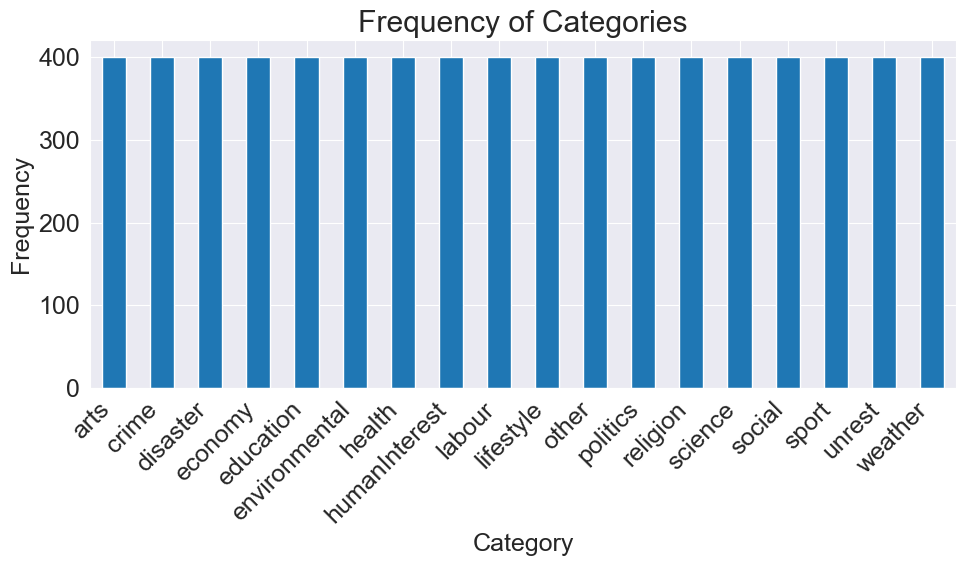

In [6]:
# Frequency of Categories

category_frequencies = data['category'].value_counts()
category_frequencies.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

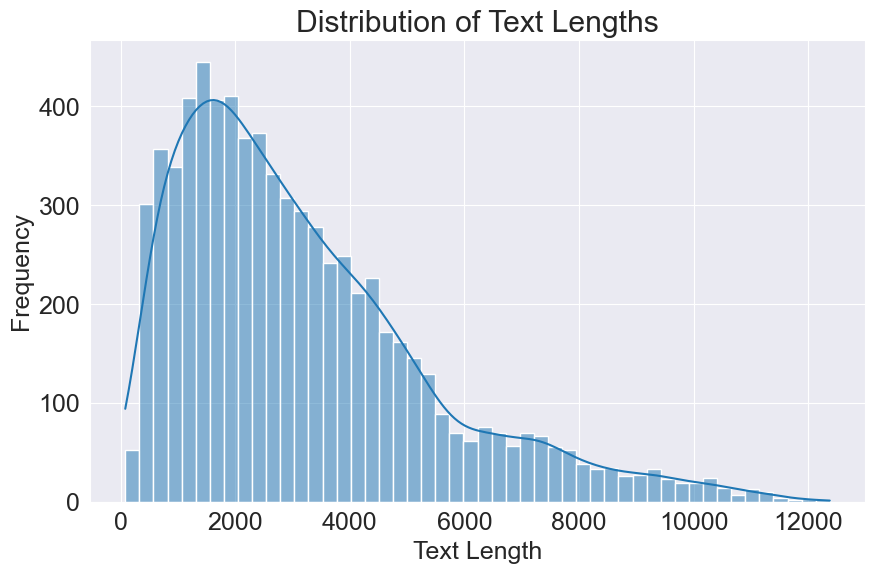

In [7]:
# Find text length

data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

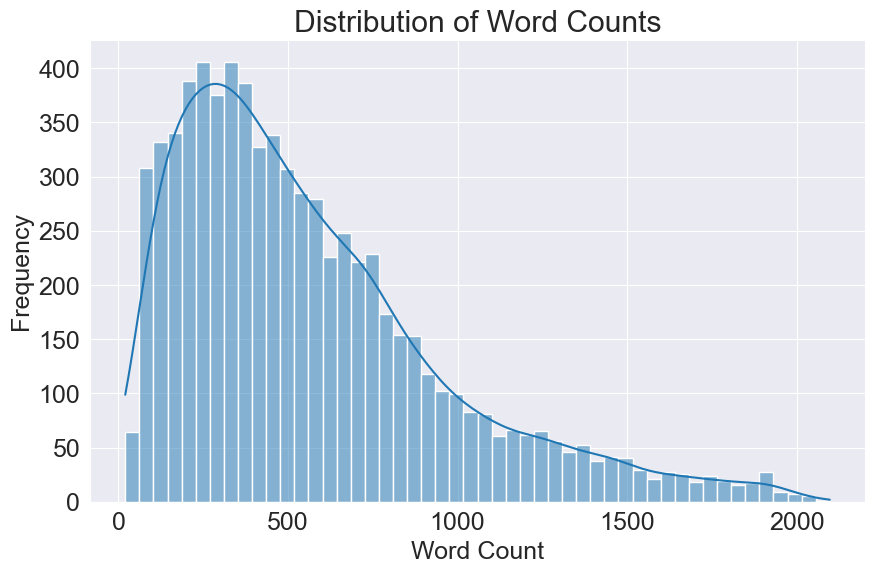

In [8]:
# Check for word counts in text

def count_words(text):
  words = word_tokenize(text)
  return len(words)

data['word_count'] = data['text'].apply(count_words)

plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

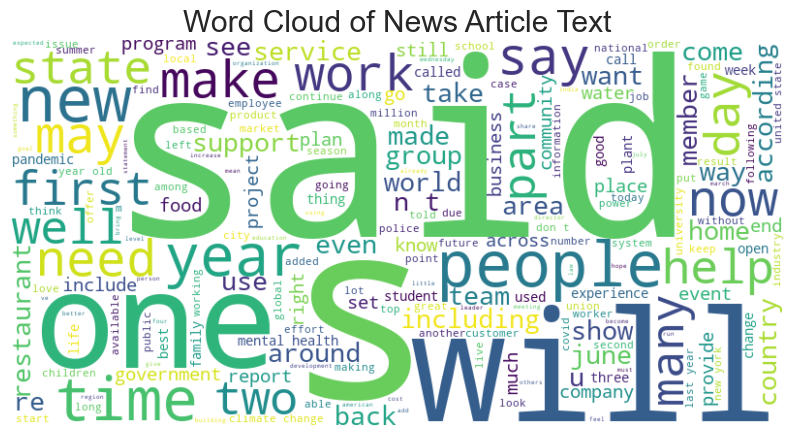

In [10]:
from wordcloud import WordCloud
#pip install wordcloud
text = ' '.join(data['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of News Article Text')
plt.axis('off')
plt.show()

Data Preparation

In [11]:
#Checking for Missing Values

data.isnull().sum()

category       0
text           0
text_length    0
word_count     0
dtype: int64

In [12]:
# Mean word length

data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.tail(10)

,category,text,text_length,word_count,mean_word_length
7190,weather,skanska has joined the climate initiative lead...,2735,451,5.230068
7191,weather,acc awards dupont s commitment to drive down g...,6142,956,5.604301
7192,weather,baringa partners has agreed for blackrock to a...,3836,597,5.625216
7193,weather,a heat dome is baking arizona and nevada where...,11376,2041,4.839836
7194,weather,the amount of carbon dioxide piling up in eart...,5263,918,4.906846
7195,weather,the maine house has voted in support of legisl...,1130,199,4.947368
7196,weather,the national security and intelligence landsca...,842,129,5.682540
7197,weather,congress votes to reinstate methane rules loos...,10060,1700,5.100667
7198,weather,exxon to focus less on fossil fuels. one of th...,7325,1319,4.795095
7199,weather,london paris moody s esg solutions announced t...,2651,421,5.513514


In [13]:
# Mean text length

data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,category,text,text_length,word_count,mean_word_length,mean_sent_length
0,arts,the associated press won two pulitzer prizes i...,10538,1893,4.727717,127.524390
1,arts,harry lidgley celebrates having completed his ...,1331,245,4.596639,132.200000
2,arts,it was also a perfect photograph framed by a b...,2682,542,4.230019,88.433333
3,arts,this undated photo shows the front and back si...,2903,499,5.050000,137.285714
4,arts,hudson a photographer in hudson recently captu...,438,80,4.628205,145.333333
5,arts,the stunning lake huron shoreline and maritime...,1179,204,4.989848,130.111111
6,arts,jay z is suing a photographer for selling pict...,1079,204,4.400000,153.285714
7,arts,olivia bowen showcases her tattooed body in a ...,3813,731,4.387006,122.032258
8,arts,the 22 year old photographer and his fiancee h...,1016,197,4.352632,112.000000
9,arts,capture and display your best photographs of b...,1249,220,4.760369,95.153846


<Figure size 1200x800 with 0 Axes>

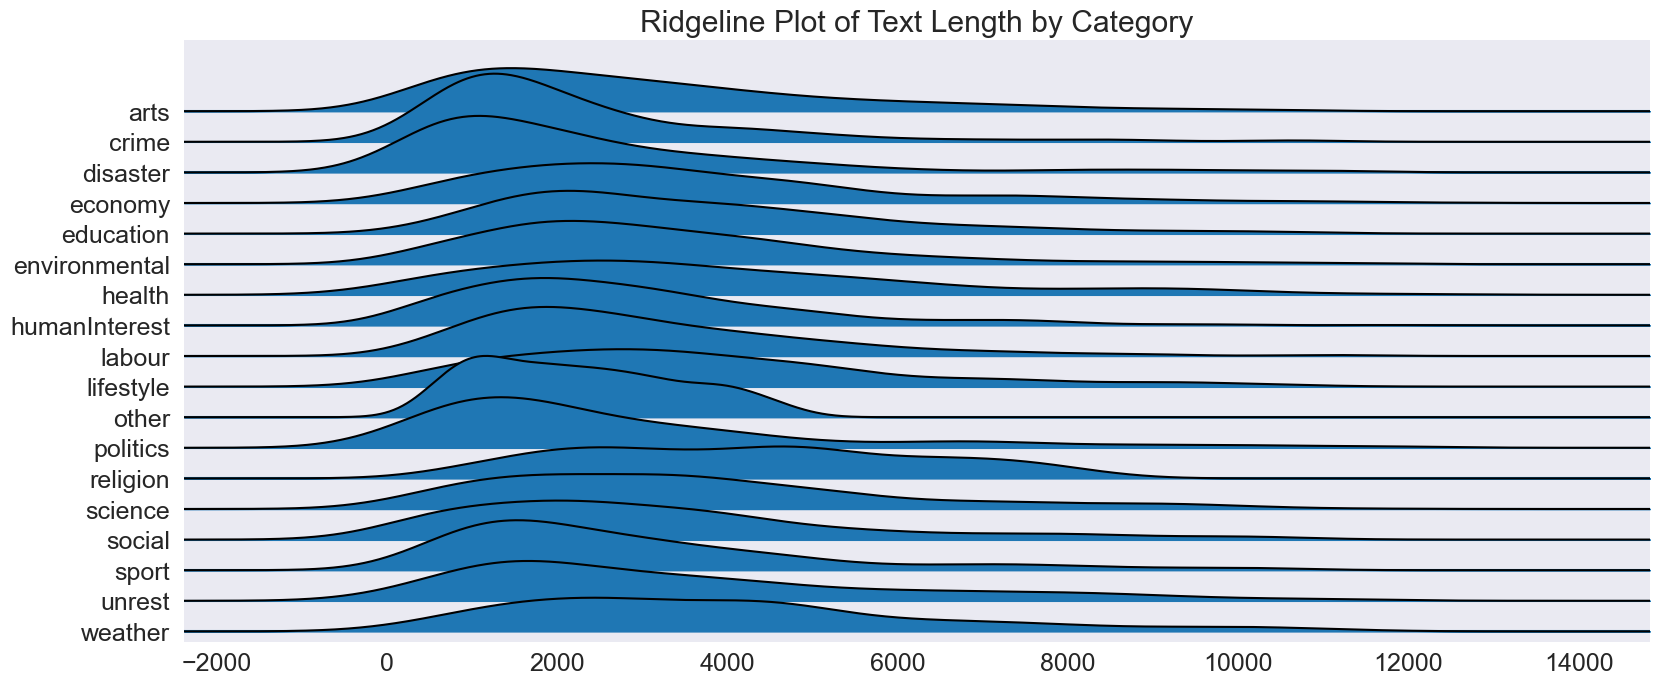

In [14]:
#Ridgeline Plot of Text Length by Category

from joypy import joyplot

plt.figure(figsize=(12,8))
joyplot(
    data=data.pivot(columns="category", values="text_length"),
    overlap=0.5
)
plt.title("Ridgeline Plot of Text Length by Category")
plt.show()


The ridgeline plot shows the distributiion of text length in each category.
Plots having a higher peak indicates categories crime, disaster, politics, sports has most texts approximately of length 1500. Economy, Environmental, Health, Lifestyle, Science, Weather have broader distribution showing a variation in the lext length. Categories such as Other and Religion had multiple peaks indicating texts of shorter and longer lengths.

In [15]:
df = data.drop(['text_length', 'word_count', 'mean_word_length', 'mean_sent_length'], axis=1)
df.head(10)

,category,text
0,arts,the associated press won two pulitzer prizes i...
1,arts,harry lidgley celebrates having completed his ...
2,arts,it was also a perfect photograph framed by a b...
3,arts,this undated photo shows the front and back si...
4,arts,hudson a photographer in hudson recently captu...
5,arts,the stunning lake huron shoreline and maritime...
6,arts,jay z is suing a photographer for selling pict...
7,arts,olivia bowen showcases her tattooed body in a ...
8,arts,the 22 year old photographer and his fiancee h...
9,arts,capture and display your best photographs of b...


**Data Cleaning**

In [16]:

def clean(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub('[^a-zA-Z\s]+', '', text)  # Keep only letters and spaces
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\best\AppData\Local\Temp\ipykernel_4684\2616620595.py:3: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('[^a-zA-Z\s]+', '', text)  # Keep only letters and spaces


In [17]:
df['text'] = df['text'].apply(clean)
df.head(10)

,category,text
0,arts,associated press two pulitzer prize photograph...
1,arts,harry lidgley celebrates completed cycle chall...
2,arts,also perfect photograph framed blurry police o...
3,arts,undated photo show front back side medal award...
4,arts,hudson photographer hudson recently captured i...
5,arts,stunning lake huron shoreline maritime vibe cr...
6,arts,jay z suing photographer selling picture witho...
7,arts,olivia bowen showcase tattooed body zebra prin...
8,arts,year old photographer fiancee bought square fo...
9,arts,capture display best photograph bird throughou...


Train-Test-Validation Split of Dataset

In [18]:

test_size_professor = 0.02  # 2% of Validation set
train_test_size = 1 - test_size_professor  # 98% of data for train-test split

# Split 2% for professor
df_train_test, df_professor = train_test_split(df, test_size=test_size_professor, random_state=42)

#Split the remaining 98% into train and test
train_size = 0.8  # 80% of the 98% for training
test_size = 1 - train_size  # 20% of the 98% for testing
df_train, df_test = train_test_split(df_train_test, train_size=train_size, random_state=42)

# Save professor's data to CSV
df_professor.to_csv('professor_data.csv', index=False)

# Sizes
print(f"Training Set: {len(df_train)} samples")
print(f"Testing Set: {len(df_test)} samples")
print(f"Professor's Set: {len(df_professor)} samples")
print("Professor's data saved as 'professor_data.csv'")

Training Set: 5644 samples
Testing Set: 1412 samples
Professor's Set: 144 samples
Professor's data saved as 'professor_data.csv'


Text Preprocessing and Feature Extraction(TextBlob)

In [19]:
# Extract TextBlob features
def extract_textblob_features(text):
    blob = TextBlob(text)
    features = {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity,
        'noun_count': len([word for word, pos in blob.tags if pos.startswith('NN')]),
        'verb_count': len([word for word, pos in blob.tags if pos.startswith('VB')]),
        'adjective_count': len([word for word, pos in blob.tags if pos.startswith('JJ')]),
    }
    return features

# Text data for vectorization
X_text = df_train_test['text']
y = df_train_test['category']

# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(lowercase= True, stop_words='english',
                             max_features=5000, use_idf=True, ngram_range=(1,3))

# Fit the vectorizer and transform the text data
X_tfidf = vectorizer.fit_transform(X_text)

# Extract TextBlob features and create a DataFrame
textblob_features = X_text.apply(extract_textblob_features).apply(pd.Series)

# Reset index to ensure alignment
textblob_features.reset_index(drop=True, inplace=True)
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.reset_index(drop=True, inplace=True)

# Ensure all column names are strings before concatenation
X_tfidf_df.columns = X_tfidf_df.columns.astype(str)
# Combine TextBlob features with TF-IDF features
X = pd.concat([X_tfidf_df, textblob_features], axis=1)


Top words for education: ['board', 'college', 'state', 'said', 'teacher', 'student', 'union', 'university', 'school', 'education']
Top words for unrest: ['conflict', 'hamas', 'violence', 'gaza', 'israeli', 'said', 'shooting', 'palestinian', 'war', 'israel']
Top words for economy: ['financial', 'bond', 'service', 'year', 'technology', 'said', 'bank', 'business', 'market', 'company']
Top words for weather: ['world', 'temperature', 'water', 'global', 'said', 'carbon', 'emission', 'change', 'climate change', 'climate']
Top words for health: ['people', 'anxiety', 'disease', 'illness', 'patient', 'heart', 'pain', 'mental health', 'health', 'mental']
Top words for politics: ['president', 'foreign affair', 'said', 'national security', 'national', 'affair', 'minister', 'security', 'foreign', 'constitution']
Top words for arts: ['movie', 'photography', 'dance', 'year', 'said', 'photographer', 'photo', 'country music', 'music', 'theater']
Top words for religion: ['like', 'day', 'time', 'life', 's

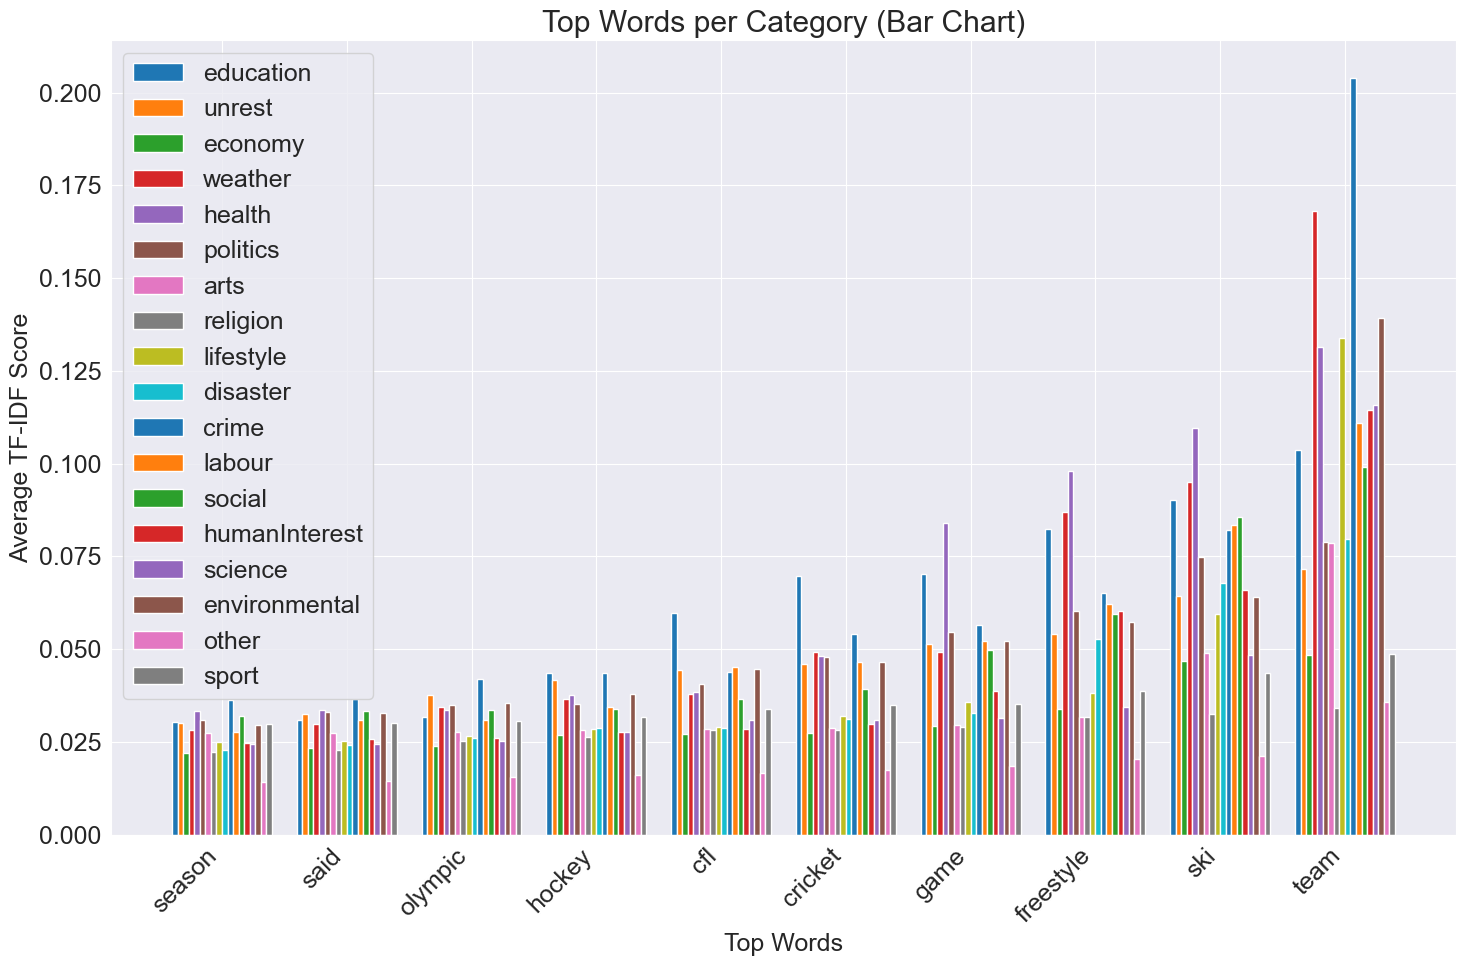

In [20]:
# Function to get top N words and their average TF-IDF scores for a category

feature_names = vectorizer.get_feature_names_out()

def top_words_for_category(category, top_n=10):
    # Filter data for the specific category
    category_data = df_train_test[df_train_test['category'] == category]['text']

    # Transform text data to TF-IDF matrix
    tfidf_matrix = vectorizer.transform(category_data)

    # Get average TF-IDF scores for each word in the category
    avg_tfidf = tfidf_matrix.mean(axis=0).A1

    # Sort words by average TF-IDF and get top N
    top_word_indices = avg_tfidf.argsort()[-top_n:]
    top_words = [feature_names[i] for i in top_word_indices]

    # Get TF-IDF scores for the top words
    top_words_tfidf = avg_tfidf[top_word_indices]

    return top_words, top_words_tfidf  


# Get top words and scores for all categories
categories = df_train_test['category'].unique()
top_words_per_category = {}
for category in categories:
    words, scores = top_words_for_category(category) 
    top_words_per_category[category] = words   
# Print or visualize the results
for category, words in top_words_per_category.items():
    print(f"Top words for {category}: {words}")

# Create bar chart
fig, ax = plt.subplots(figsize=(15, 10))  

category_names = list(top_words_per_category.keys())
num_categories = len(category_names)
bar_width = 0.8 / num_categories  

# Create bars for each category
for i, category in enumerate(category_names):
    words, tfidf_scores = top_words_for_category(category)  
    x_positions = np.arange(len(words)) + i * bar_width
    ax.bar(x_positions, tfidf_scores, width=bar_width, label=category)

# Set labels and title
ax.set_xlabel("Top Words")
ax.set_ylabel("Average TF-IDF Score")
ax.set_title("Top Words per Category (Bar Chart)")
ax.set_xticks(np.arange(len(words)) + bar_width * (num_categories - 1) / 2)  
ax.set_xticklabels(words, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

Words like "hockey", "cfl", "cricket", "game", "ski", and "team" have higher TF-IDF scores, especially in categories likely related to sports.
The word "olympic" also appears to have significant importance across multiple categories, likely within sports, human interest, and politics.
The word "said" has a relatively lower but consistent presence across all categories, which is expected as it is commonly used in reporting and quotes.
Crime, disaster, and political categories have lower representation for these top words, suggesting their significant terms might be different.


The chart highlights sport-related words as dominant, as evidenced by high TF-IDF scores for words like "team," "hockey," and "cricket."
Different categories contribute differently to each word’s importance, with some words being highly specific to a category.
TF-IDF effectively distinguishes the importance of words in specific categories, making this a useful technique for text classification.

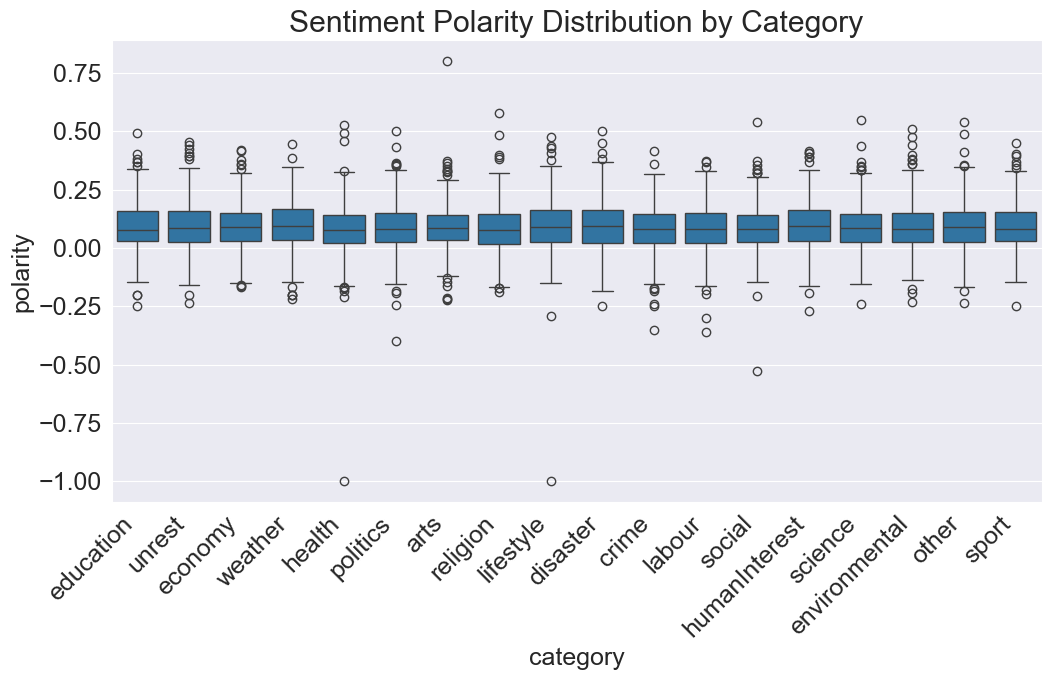

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add TextBlob features as columns to df_train_test
df_train_test = pd.concat([df_train_test, textblob_features], axis=1)

# Create a DataFrame with category and polarity
sentiment_data = df_train_test[['category', 'polarity']] # Assuming 'polarity' is the column name

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='polarity', data=sentiment_data)
plt.title('Sentiment Polarity Distribution by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

Most categories exhibit a similar distribution with a slight skew towards positivity.
Some categories like "disaster" and "crime" have more pronounced negative outliers, which is expected given the nature of those topics.
"Arts," "lifestyle," and "sport" might have slightly higher positive sentiment distributions compared to others.

**Feature Selection**

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(chi2, k=1000)  # Select top 1000 features
X_new = selector.fit_transform(X_scaled, y)
X_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14489304, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Modeling**

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}

We have chosen 3 models based on the following factors:

*   Logistic Regression : handle multi-class classification with One-vs-Rest (OvR) or Softmax. It interprets well on balanced datasets.
*   Random Forest: combines the predictions of multiple decision trees, reducing the risk of overfitting and improving generalization.
*  SVM : Performs better than Naive Bayes.

**Cross-Validation**

In [25]:
# Define K-Fold
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and store results
results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_new, y, cv=kf, scoring='accuracy')
    for fold, score in enumerate(scores, 1):
        results.append({
            "Model": model_name,
            "Fold": fold,
            "Accuracy": score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Fold,Accuracy
0,Logistic Regression,1,0.718839
1,Logistic Regression,2,0.727144
2,Logistic Regression,3,0.742736
3,Logistic Regression,4,0.738483
4,Logistic Regression,5,0.749114
5,Random Forest,1,0.725212
6,Random Forest,2,0.710135
7,Random Forest,3,0.746988
8,Random Forest,4,0.741318
9,Random Forest,5,0.733522


**Feature extraction on Test-set**

In [26]:
# Extract TextBlob features from df_test['text']
textblob_features_test = df_test['text'].apply(extract_textblob_features).apply(pd.Series)

# Reset index to ensure alignment
textblob_features_test.reset_index(drop=True, inplace=True)

# Transform df_test['text'] using the same vectorizer used for training
X_tfidf_test = vectorizer.transform(df_test['text'])
X_tfidf_test_df = pd.DataFrame(X_tfidf_test.toarray()) # Convert to DataFrame
X_tfidf_test_df.reset_index(drop=True, inplace=True) # Reset index for alignment

# Ensure all column names are strings before concatenation
X_tfidf_test_df.columns = X_tfidf_test_df.columns.astype(str)

# Combine TextBlob and TF-IDF features for the test set
X_test = pd.concat([X_tfidf_test_df, textblob_features_test], axis=1)

# Scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# Select the same features using the selector used for training data
X_test_new = selector.transform(X_test_scaled)


**Prediction**

In [27]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store test results
test_results = []

# Train and evaluate all models on the test set
for model_name, model in models.items():
    # Train the model on the full training data
    model.fit(X_new, y)  # X_new is the selected features from the training set

    # Predict on the test set
    y_pred = model.predict(X_test_new)  # X_test_new is the selected features from the test set

    # Compute overall performance metrics
    accuracy = accuracy_score(df_test['category'], y_pred)
    precision = precision_score(df_test['category'], y_pred, average='weighted', zero_division=0)
    recall = recall_score(df_test['category'], y_pred, average='weighted', zero_division=0)
    f1 = f1_score(df_test['category'], y_pred, average='weighted', zero_division=0)

    # Compute per-class performance metrics
    class_report = classification_report(df_test['category'], y_pred, zero_division=0, output_dict=True)

    # Append overall results to the list
    test_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Per-Class Report": class_report
    })

# Convert results into a DataFrame
test_results_df = pd.DataFrame(test_results)

# Display overall metrics
print(test_results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])

# Display per-class metrics for each model
for index, row in test_results_df.iterrows():
    print(f"\nPer-Class Metrics for {row['Model']}:")
    class_report_df = pd.DataFrame(row['Per-Class Report']).transpose()
    print(class_report_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.849858   0.848886  0.849858  0.848619
1        Random Forest  0.966714   0.966619  0.966714  0.966570
2                  SVM  0.903683   0.918034  0.903683  0.900453

Per-Class Metrics for Logistic Regression:
               precision    recall  f1-score      support
arts            0.921348  0.921348  0.921348    89.000000
crime           0.842697  0.914634  0.877193    82.000000
disaster        0.887500  0.855422  0.871166    83.000000
economy         0.773196  0.842697  0.806452    89.000000
education       0.876543  0.855422  0.865854    83.000000
environmental   0.965517  0.943820  0.954545    89.000000
health          0.957746  0.931507  0.944444    73.000000
humanInterest   0.869048  0.912500  0.890244    80.000000
labour          0.908046  0.940476  0.923977    84.000000
lifestyle       0.662500  0.706667  0.683871    75.000000
other           0.410714  0.359375  0.383333    64.000000
poli

Flask Deployment

In [28]:
#Save Models Using pickle

import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the selector
with open('selector.pkl', 'wb') as f:
    pickle.dump(selector, f)

# Save all models
for model_name, model in models.items():
    with open(f'{model_name.replace(" ", "_").lower()}.pkl', 'wb') as f:
        pickle.dump(model, f)

print("✅ All models and transformers saved successfully!")


✅ All models and transformers saved successfully!
